In [5]:
#import Libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  
from utils.utils_functions import Utils_functions

In [6]:
#faccio 4 procedimenti complementari, uno con i dati raw, uno con i dati normalizzati, uno con i dati standardizzati e uno con le componenti principali estratte tramite la pca, durante l'esplorazione del 
#dataset abbiamo notato come il 90% della varianza viene spiegato dalle prime 8 componenti.
X, y = Utils_functions.load_data()
#inizializzo lo standardizzatore
scaler = StandardScaler()

#standardizzo i dati (media 0 e varianza 1)
X_std = scaler.fit_transform(X)

#normalizzo i dati (valori tra 0 e 1)
X_norm = (X - X.min()) / (X.max() - X.min())

#applico pca con 8 componenti principali
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_std)

#creo una lista con i tre dataset
datasets = [X, X_std, X_norm, X_pca]
datasets_names = ["Raw", "Standardized", "Normalized", "Extracted"]




/var/folders/nk/szdff2wj6tvc_kvf5fxnh6n00000gn/T/ipykernel_20472/3359404114.py:18: RuntimeWarning: Mean of empty slice.
  centroids = np.array([reduced_data[labels == cluster].mean(axis=0) for cluster in range(10)])
/Users/alessandrococco/miniconda3/envs/analisi-pendigits/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


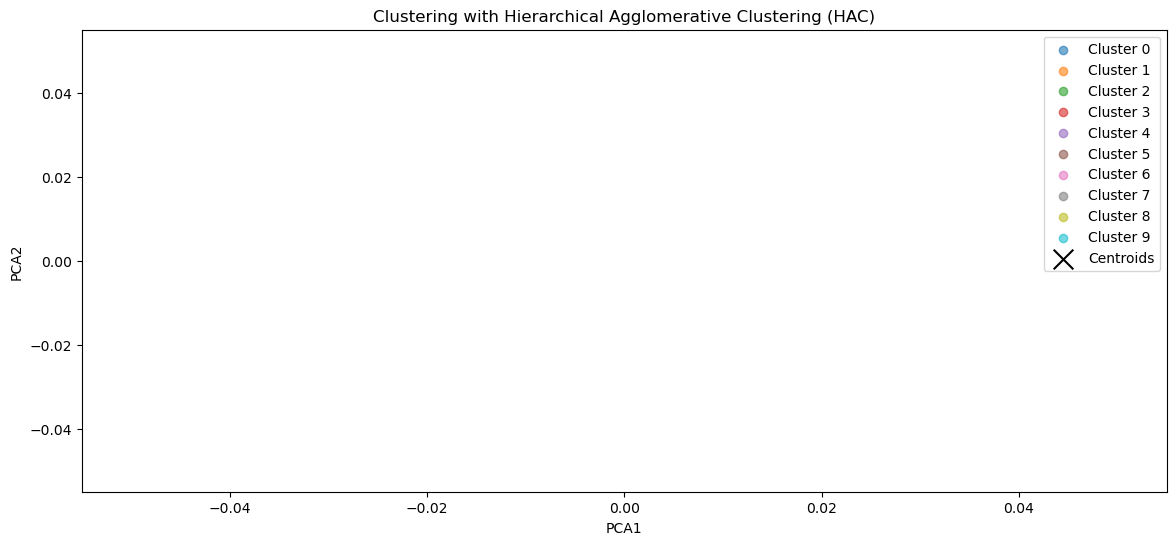

Metriche con Dataset: Raw
ARI: 0.0
NMI: 0.0
Homogeneity: 0.0
Completeness: 1.0
V-Measure: 0.0




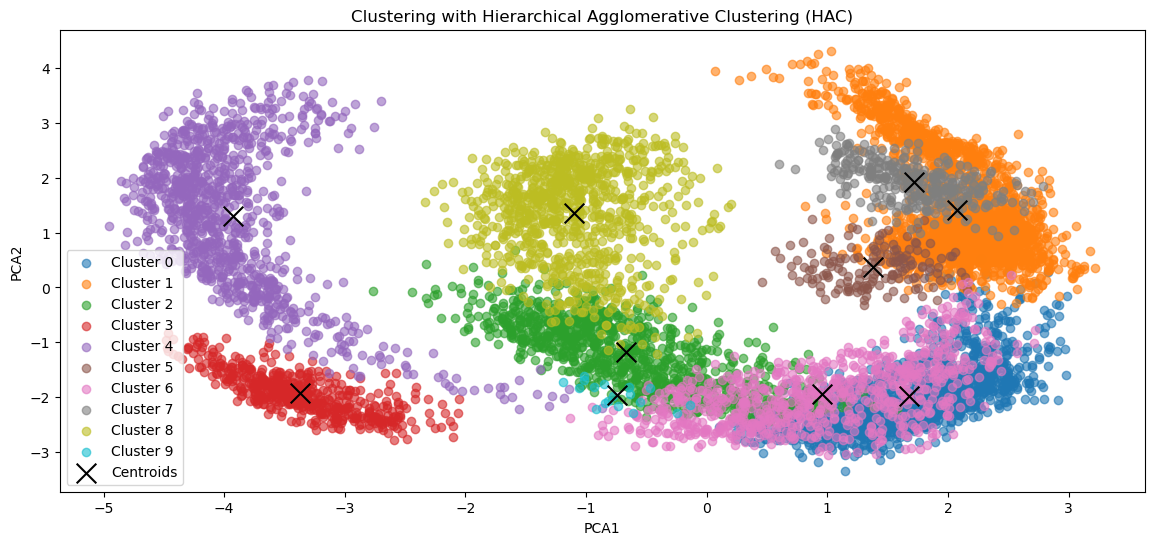

Metriche con Dataset: Standardized
ARI: 0.47873300143984987
NMI: 0.689628633907411
Homogeneity: 0.6763329652206235
Completeness: 0.703457529930739
V-Measure: 0.689628633907411




/var/folders/nk/szdff2wj6tvc_kvf5fxnh6n00000gn/T/ipykernel_20472/3359404114.py:18: RuntimeWarning: Mean of empty slice.
  centroids = np.array([reduced_data[labels == cluster].mean(axis=0) for cluster in range(10)])
/Users/alessandrococco/miniconda3/envs/analisi-pendigits/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


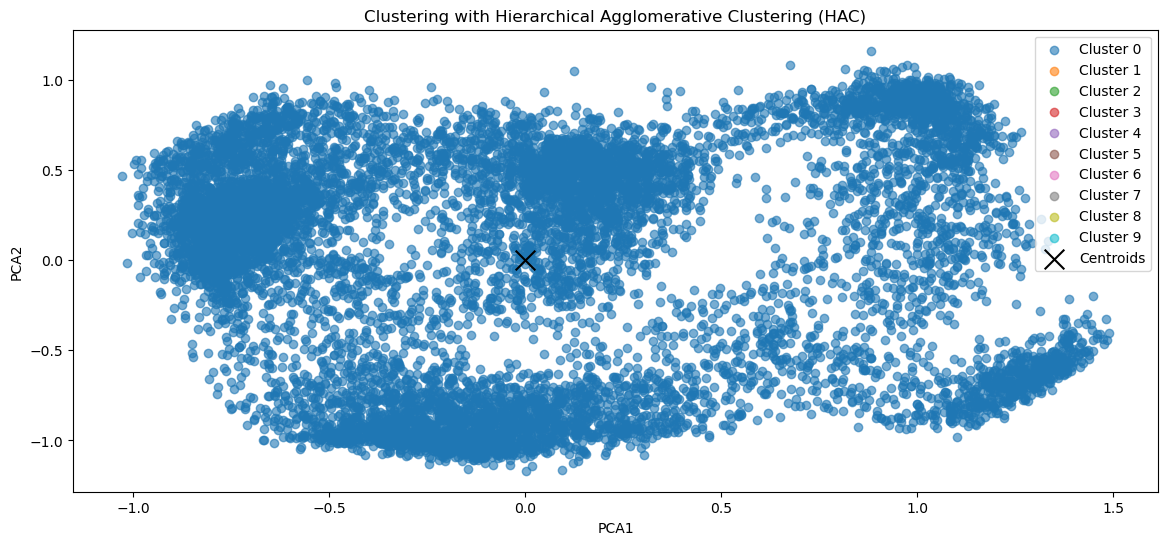

Metriche con Dataset: Normalized
ARI: 0.0
NMI: 0.0
Homogeneity: 0.0
Completeness: 1.0
V-Measure: 0.0




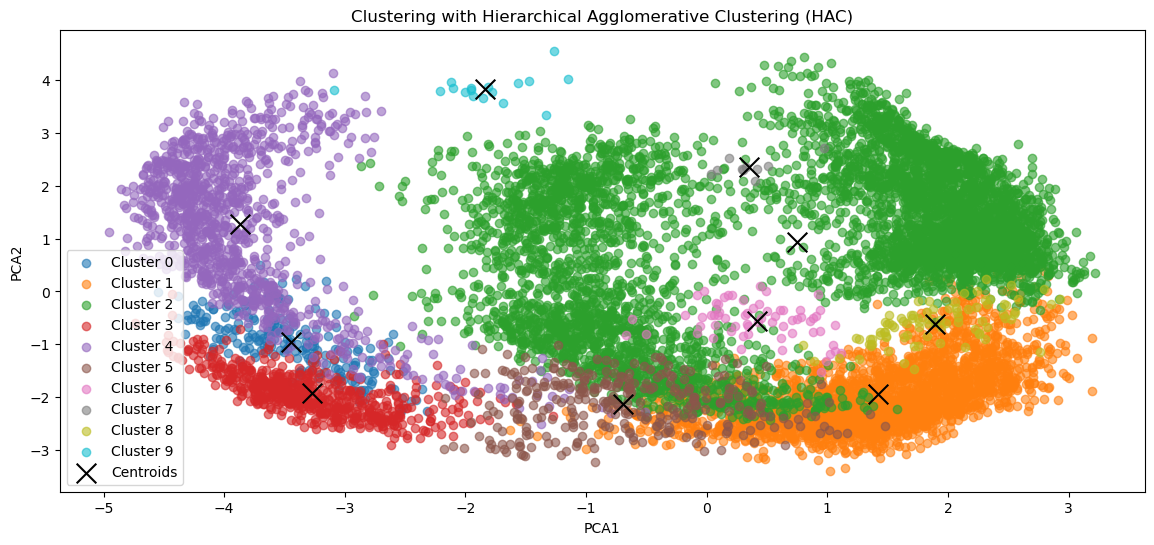

Metriche con Dataset: Extracted
ARI: 0.2585460369606019
NMI: 0.5449588643978601
Homogeneity: 0.4669035424397847
Completeness: 0.654351006045794
V-Measure: 0.5449588643978601




In [7]:
#inizializzo il modello con eps=0.5 e min_samples=5.
#eps è la distanza massima tra due campioni per essere considerati nello stesso cluster
#min_samples è il numero minimo di campioni in un vicinato per essere considerati core point
dbscan = DBSCAN(eps=1, min_samples=10)

#per ogni dataset eseguo il clustering e prendo labels
for i, X in enumerate(datasets):
    
    #eseguo il clustering
    labels = dbscan.fit_predict(X)

    #riduco le dimensioni per poter fare il plot in 2D
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)
    
    #calcolo i centroidi come media dei punti per ogni cluster
    #per ogni cluster calcolo la media dei punti, prendendo solo i punti del cluster in questione tramite la maschera labels == cluster
    centroids = np.array([reduced_data[labels == cluster].mean(axis=0) for cluster in range(10)])
    
    #creo un dataframe con i dati ridotti e i cluster
    df_pca = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
    df_pca['Cluster'] = labels
    
    #plotto i dati in 2D con i centroidi
    plt.figure(figsize=(14, 6))
    for cluster in range(10):
        cluster_data = df_pca[df_pca['Cluster'] == cluster]
        plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], 
                    label=f'Cluster {cluster}', 
                    alpha=0.6)
    
    #plotto i centroidi
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                marker='x', 
                s=200, 
                c='black', 
                label='Centroids')
    
    plt.title('Clustering with Hierarchical Agglomerative Clustering (HAC)')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend()
    plt.show()

    #calcolo i valori di similarità
    ari = adjusted_rand_score(y, labels)
    nmi = normalized_mutual_info_score(y, labels)
    hom = homogeneity_score(y, labels)
    comp = completeness_score(y, labels)
    vms = v_measure_score(y, labels)

    print(f"Metriche con Dataset: {datasets_names[i]}")
    print(f"ARI: {ari}")
    print(f"NMI: {nmi}")
    print(f"Homogeneity: {hom}")
    print(f"Completeness: {comp}")
    print(f"V-Measure: {vms}")
    print("\n")

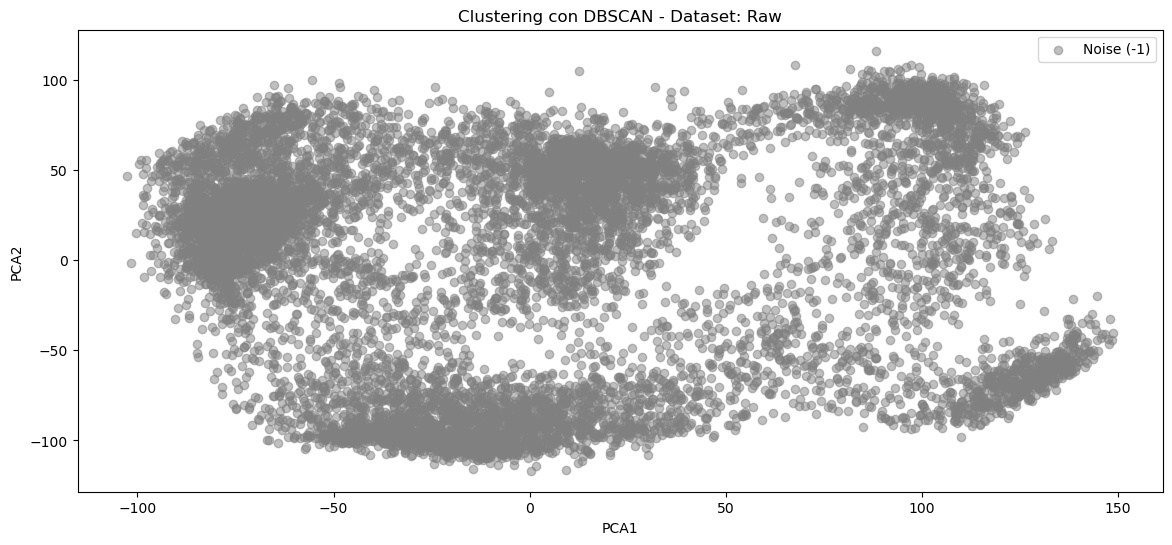

Nessun k in [2..15] è stato trovato per Raw. Impossibile tracciare SSE.


NameError: name 'compute_sse' is not defined

In [8]:
# colonne per PCA
columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8']
columns_2d = ['PCA1', 'PCA2']
columns_3d = ['PCA1', 'PCA2', 'PCA3']



#funzione per trovare il "gomito" del grafico SSE vs numero di cluster
def find_elbow_point(x_vals, y_vals):
    """
    Trova il punto del "elbow" utilizzando il metodo della distanza massima.

    Parameters:
    x_vals (list): Valori x (numero di cluster)
    y_vals (list): Valori y (SSE medio)

    Returns:
    int: Numero di cluster corrispondente al gomito
    """
    p1 = np.array([x_vals[0], y_vals[0]])
    p2 = np.array([x_vals[-1], y_vals[-1]])

    max_distance = -1
    elbow_point = x_vals[0]

    #Calcola la distanza massima dalla linea retta tra il primo e l'ultimo punto
    for i in range(len(x_vals)):
        p = np.array([x_vals[i], y_vals[i]])
        distance = np.abs(np.cross(p2-p1, p-p1) / np.linalg.norm(p2-p1))
        if distance > max_distance:
            max_distance = distance
            elbow_point = x_vals[i]

    return elbow_point

param_grid = {
    'eps': np.arange(0.1, 3, 0.5),      
    'min_samples': range(6, 30, 5),
}

for i, X in enumerate(datasets):
    X = np.array(X, dtype=float)  
    y = np.array(y, dtype=int)  

    #dizionario per tenere traccia dell'sse in base ai cluster
    sse_dict = {k: [] for k in range(2, 16)}

    best_score = -1.0
    best_params = (None, None)  #(eps, min_samples)

    #grid search
    for eps in param_grid['eps']:
        for min_s in param_grid['min_samples']:
            dbscan_test = DBSCAN(eps=eps, min_samples=min_s)
            labels_test = dbscan_test.fit_predict(X)

            #calcolo ARI
            ari_test = adjusted_rand_score(y, labels_test)

            #aggiorno i migliori parametri se trovo uno score ARI più alto
            if ari_test > best_score:
                best_score = ari_test
                best_params = (eps, min_s)

            #calcolo numero di cluster (ignorando -1 se presente)
            unique_labels = set(labels_test)
            if -1 in unique_labels:
                unique_labels.remove(-1)
            k = len(unique_labels)

            #se k in [2..15], calcolo l’SSE e lo salvo
            if 2 <= k <= 15:
                sse_value = compute_sse(X, labels_test)
                sse_dict[k].append((sse_value, eps, min_s))  #salvo anche i parametri

    #terminata la grid search, uso i parametri "migliori" per un clustering finale
    best_eps, best_min_samples = best_params
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    labels = dbscan.fit_predict(X)

    #riduzione con pca per il plot
    if i != 3: 
        pca = PCA(n_components=8)
        reduced_data = pca.fit_transform(X)
    else:
        reduced_data = X

    #calcolo i centroidi reali dei cluster (senza -1)
    unique_labels = set(labels)
    if -1 in unique_labels:
        unique_labels.remove(-1)

    centroids = []
    for cluster_id in unique_labels:
        cluster_points = reduced_data[labels == cluster_id]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)

    #plot dei risultati 
    df_pca = pd.DataFrame(reduced_data, columns=columns)
    df_pca['Cluster'] = labels

    plt.figure(figsize=(14, 6))
    for cluster_id in set(labels):
        cluster_data = df_pca[df_pca['Cluster'] == cluster_id]
        if cluster_id == -1:
            plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], 
                        label='Noise (-1)', alpha=0.5, c='gray')
        else:
            plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], 
                        label=f'Cluster {cluster_id}', alpha=0.6)

    #plot dei centroidi
    if len(centroids) > 0:
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=200, c='black', 
                    label='Centroids')

    plt.title(f"Clustering con DBSCAN - Dataset: {datasets_names[i]}")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.legend()
    plt.show()

    #grafico sse vs numero di cluster
    x_vals, y_vals = [], []
    for k in range(2, 16):
        if len(sse_dict[k]) > 0:
            avg_sse = np.mean([entry[0] for entry in sse_dict[k]])  #solo valori SSE
            x_vals.append(k)
            y_vals.append(avg_sse)

    if len(x_vals) > 0:  #evito errori se non c'è nessun k in [2..15]
        elbow_point = find_elbow_point(x_vals, y_vals)

        plt.figure(figsize=(8, 5))
        plt.plot(x_vals, y_vals, marker='o', label='SSE medio')
        plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow Point: {elbow_point}')
        plt.xlabel("Numero di cluster")
        plt.ylabel("SSE medio")
        plt.title(f"SSE medio vs # cluster (DBSCAN) - {datasets_names[i]}")
        plt.grid(True)
        plt.legend()
        plt.show()

        print(f"Il punto del gomito si trova a {elbow_point} cluster per {datasets_names[i]}.")
    else:
        print(f"Nessun k in [2..15] è stato trovato per {datasets_names[i]}. Impossibile tracciare SSE.")
